## "So long as there are men, there will be wars"

The quote above, by Albert Einstein, paints a depressing reality of the world. War is a part of human civilization, hence it's existence will always be perpetuated. However, war is still a war and it deprives everyone, most importantly the innocent ones, of happiness, dignity, future, and life. Therefore, it's in humanity's best interest to minimalize, and hopefully one day eradicate, war.

The following analysis will try to find the correlation between political ideology and their likelihood to go to war. For this analysis, I will be using "The Global Leader Ideology" dataset by Bastian Herre(2021) and Correlates of War's War Data by Sarkees, et al.(2010) 

### Context
Political ideology is a set of rules or principles that is attributed to someone or political entity. As such, it constrains the actor from taking decision that doesn't conform with their ideology. For example, let's say that we have two entity with the political ideology of capitalism and communism. Inherently, these two are always clashing because one is the antithesis of the other. Capitalism believes that the market should be left alone and let the it distributes the wealth, while communism believes that capitalism is not fair, so an intervention to the market is necessary. The capitalist will never resort to disrupt the market as it would backlash with their idea and doesn't contribute to their goal. By the same logic, the communist will never let their controlover their market go. To put it simply, political ideology is an important factor in decision making.

There are various political ideology, ranging from anarchism to environmentalism, but in general can be categorised into three broad spectrum; leftist, rightist, and centrist. Leftist generally supports social equality and usually more open to changes. Rightist, commonly referred as conservatives, generally supports the existing social order and believes that social stratification is inevitable. On the other hand, centrist is trying to bring the two ideas together.

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')

In [39]:
leadership = pd.read_csv("gli.csv")
intra_wars = pd.read_csv("intra_wars_state.csv", encoding='mac_roman')

In [40]:
leadership= leadership[["country_name", 
                              "country_code_cow", 
                              "year", 
                              "hog", 
                              "hog_ideology",                             
                             "leader",
                             "leader_ideology"]].copy()

intra_wars= intra_wars[["WarNum",
                              "WarName",
                              "CcodeA",
                              "SideA",
                              "CcodeB",
                              "SideB",
                              "StartYr1",
                              "Initiator"]].copy()

leadership.rename(columns={"country_name" : "state", "country_code_cow" : "ccode"}, inplace=True)

intra_wars.rename(columns={"CcodeA" : "ccode_a", "CcodeB" : "ccode_b", "StartYr1" : "year"}, inplace=True)

# Global Leadership dataset only recorded data from 1945
x = intra_wars[intra_wars["year"] >= 1945]

# Correlates of War dataset only recorded data until 2014
leader = leadership_clean[leadership["year"] <= 2014].copy()

In [19]:
df = x.merge(leadership, on='year')

In [20]:
dfx = df[(df["ccode_a"] == df["ccode"]) | (df["ccode_b"] == df["ccode"])].copy()

## Data Features
### The Global Leader Ideology
* state : The name of the state
* ccode : CoW's state code
* year : The year when the data is recorded
* hog : Head of Government's name
* hog_ideology : Head of Government's political ideology
* leader : State leader's name
* leader_ideology : State leader's political ideology

### Correlates of War
* WarNum : Index
* WarName : Name of the war
* ccode_a : CoW's state code of the first belligerent
* SideA   : Name of the first belligerent
* ccode_b : CoW's state code of the second belligerent
* SideB   : Name of the second belligerent
* year    : The year when the war was officially declared or first battle took place
* initiator : Name of the belligerent who started the war

## Univariate Analysis

In [23]:
leader["hog_ideology"].value_counts()

leftist           4296
rightist          3845
centrist           872
no information     635
not applicable     247
none                35
Name: hog_ideology, dtype: int64

In [24]:
leader["leader_ideology"].value_counts()

leftist           4474
rightist          4142
centrist           741
no information     406
not applicable     143
none                24
Name: leader_ideology, dtype: int64

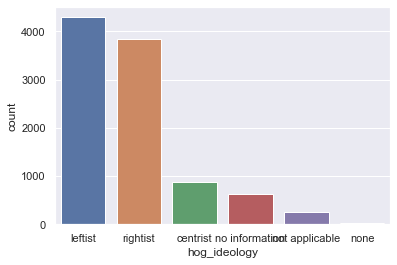

In [44]:
fig = plt.plot()

sns.countplot(x = "hog_ideology", data=leader, order = leader['hog_ideology'].value_counts().index)

plt.show()

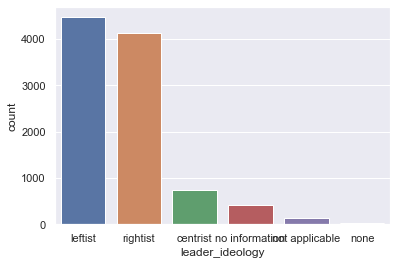

In [43]:
fig = plt.plot()

sns.countplot(x = "leader_ideology", data=leader, order = leader['leader_ideology'].value_counts().index)

plt.show()

The data shows that there isn't many centrist leader, whether it be head of government of state leader. Meanwhile, the differences between leftist and rightist leader is notably small.

In [7]:
dfx["hog_ideology"].value_counts()

leftist           146
rightist          109
centrist           31
no information     29
Name: hog_ideology, dtype: int64

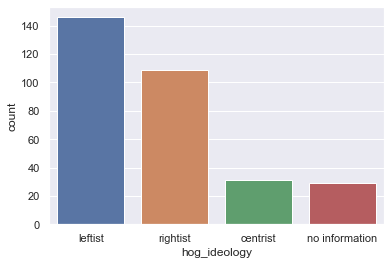

In [48]:
f = plt.plot(figsize=(15, 10))

sns.countplot(x = "hog_ideology", data=dfx, order= dfx["hog_ideology"].value_counts().index)

plt.show()

In [14]:
# Ratio
leftist = dfx["hog_ideology"].value_counts()["leftist"] / leader["hog_ideology"].value_counts()["leftist"] * 100
rightist = dfx["hog_ideology"].value_counts()["rightist"] / leader["hog_ideology"].value_counts()["rightist"] * 100
centrist = dfx["hog_ideology"].value_counts()["centrist"]/ leader["hog_ideology"].value_counts()["centrist"] * 100

In [15]:
leftist

3.3985102420856608

In [16]:
rightist

2.8348504551365408

In [17]:
centrist

3.555045871559633

The result returns an expected data distribution. However, if we calculate the ratio between the ones that go to war and the ones that dont, centrist tends to be a little bit more aggresive than the others. 

In [8]:
dfx["leader_ideology"].value_counts()

leftist           160
rightist          116
centrist           27
no information     11
not applicable      1
Name: leader_ideology, dtype: int64

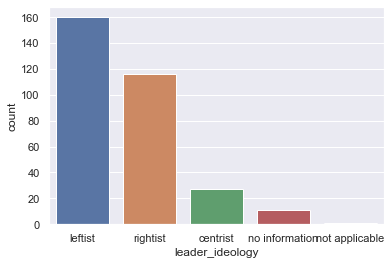

In [49]:
f = plt.plot(figsize=(15, 10))


sns.countplot(x = "leader_ideology", data= dfx, order = dfx["leader_ideology"].value_counts().index)

plt.show()

In [50]:
# Ratio
leftist = dfx["leader_ideology"].value_counts()["leftist"] / leader["leader_ideology"].value_counts()["leftist"] * 100
rightist = dfx["leader_ideology"].value_counts()["rightist"] / leader["leader_ideology"].value_counts()["rightist"] * 100
centrist = dfx["leader_ideology"].value_counts()["centrist"]/ leader["leader_ideology"].value_counts()["centrist"] * 100

In [51]:
leftist

3.5762181493071075

In [52]:
rightist

2.8005794302269438

In [53]:
centrist

3.643724696356275

Again, the result returns an expected data distribution. Rightist is also less agressive than the other two based on the ratio. 

## Conclusion
The political ideology doesn't determine state's participation in war

### Bibliography:

Herre, Bastian. 2021. Identifying Ideologues: A Global Dataset on Political Leaders, 1945-2020. Working Paper.
Sarkees, Meredith Reid and Frank Wayman (2010). Resort to War: 1816 - 2007. Washington DC: CQ Press.